# 원천 이미지에서 신호등 영역만 추출하여 시각화

## 하나의 이미지로 테스트 
파일명 : 14959040.jpg (paths 경로에 넣어두기)

In [26]:
import os
import matplotlib.pyplot as plt

# 신호등 후보 영역 검출 로직 임포트
# import sys
# sys.path.append("..") # 상위 디렉토리 접근 (같은 경로에 있다면 안해도됨)
from traffic_light_module import *

In [27]:
# 추출 전 데이터 위치 (테스트할 원천이미지가 있는 경로)
paths = "./trainingData/training/test/"

# 신호등 검출 후 저장할 위치 (g, y, r 나눠줄 필요없음)
val_path = './vali_data/'

In [28]:
light_list = os.listdir(paths)

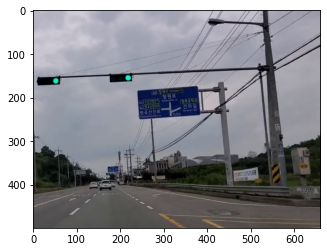

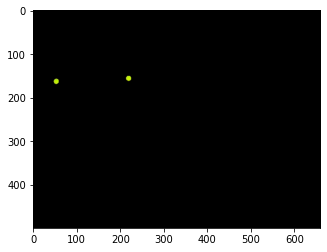

./trainingData/training/test/frame14.png///G5.jpg
./trainingData/training/test/frame14.png///G6.jpg


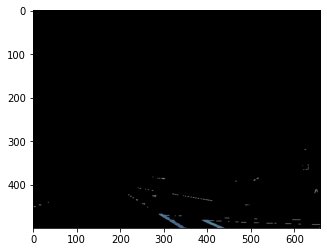

./trainingData/training/test/frame14.png///Y7.jpg


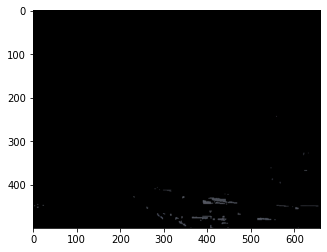

./trainingData/training/test/frame14.png///R8.jpg


In [29]:
first_detect = []

for img in light_list:
    if img == ".DS_Store":
        continue
        
    show_img = cv2.imread(paths + img)
    show_img = cv2.cvtColor(show_img, cv2.COLOR_BGR2RGB)
    show_img = show_img[0:500, 300:1700]
    plt.imshow(show_img)
    plt.show()
    print("===========================================================")
        
    # ROI 지정, x,y,w,h ,N 설정 완료
    x1 = 300
    y1 = 0
    w1 = 1400
    h1 = 500
    
    green(paths, img, X = x1, Y = y1, W = w1, H = h1, first_detect = first_detect, path_g = val_path)
    yellow(paths, img, X = x1, Y = y1, W = w1, H = h1, first_detect = first_detect, path_y = val_path)
    red(paths, img, X = x1, Y = y1, W = w1, H = h1, first_detect = first_detect, path_r = val_path)

In [30]:
first_detect

[[[154, 173, 313, 364], 'frame14_5'],
 [[148, 166, 481, 529], 'frame14_6'],
 [[409, 422, 933, 966], 'frame14_7'],
 [[480, 499, 629, 690], 'frame14_8']]

# 신경망 모델에 적용

In [31]:
import os
import cv2
import numpy as np
import random
from PIL import Image

from matplotlib import pyplot as plt
from tensorflow import keras
import tensorflow as tf

## 신호등 검출 및 색 분류 모델 불러오기

In [32]:
model = tf.keras.models.load_model('traffic_light_0315_2.h5')

In [33]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 11, 41, 16)        1216      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 5, 20, 16)        0         
 2D)                                                             
                                                                 
 dropout_15 (Dropout)        (None, 5, 20, 16)         0         
                                                                 
 conv2d_7 (Conv2D)           (None, 3, 18, 32)         4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 1, 9, 32)         0         
 2D)                                                             
                                                                 
 dropout_16 (Dropout)        (None, 1, 9, 32)         

## 검출된 신호등 이미지를  입력값으로 만들기

In [34]:
Path2 = './vali_data/'
file_list = os.listdir(Path2)

if ".DS_Store" in file_list:
    file_list.remove(".DS_Store")

data2 = []

for A in file_list:
    if A == ".DS_Store":
        continue
    try:
        img2 = cv2.imread(Path2+A)
        res2 = cv2.resize(img2, dsize = (45, 15), interpolation=cv2.INTER_CUBIC)
        cv2.imwrite(Path2+A,res2)
    except Exception as e:
        print(str(e))
    
for A in file_list:
    if A == ".DS_Store":
        continue
    try:
        img3 = Image.open(Path2+A)
        data2.append(np.array(img3))
        img3.close()
    except Exception as e:
        print(str(e))

In [35]:
data2

[array([[[ 13,  13,  21],
         [ 54,  54,  62],
         [ 67,  67,  75],
         ...,
         [  0,   3,   9],
         [ 15,  18,  27],
         [  6,   2,  16]],
 
        [[  0,   0,   5],
         [  7,   8,  13],
         [  2,   3,   8],
         ...,
         [  1,   6,  10],
         [ 20,  23,  30],
         [ 73,  73,  85]],
 
        [[  2,   1,   6],
         [  2,   1,   6],
         [  0,   0,   4],
         ...,
         [  7,  10,  15],
         [ 49,  52,  59],
         [123, 127, 138]],
 
        ...,
 
        [[  1,   2,   6],
         [  0,   1,   3],
         [  0,   1,   3],
         ...,
         [ 59,  61,  74],
         [152, 155, 170],
         [157, 160, 175]],
 
        [[  0,   0,   5],
         [  0,   0,   5],
         [  0,   0,   4],
         ...,
         [137, 136, 150],
         [164, 163, 179],
         [159, 156, 173]],
 
        [[ 31,  31,  39],
         [ 35,  35,  43],
         [ 40,  40,  48],
         ...,
         [167, 166, 180],
  

## 모델에 적용

In [36]:
data2 = np.asarray(data2) / 255.0
prediction = model.predict(data2)

In [37]:
prediction

array([[9.9992311e-01, 4.2339121e-05, 3.4568180e-05],
       [9.9992883e-01, 3.8373189e-05, 3.2763037e-05],
       [1.8030490e-01, 1.5516065e-01, 6.6453439e-01],
       [1.2890802e-01, 7.8585517e-01, 8.5236803e-02]], dtype=float32)

## 결과 값

In [38]:
len(first_detect)

4

In [39]:
light_order = {0:"green",1:"red",2:"yellow",3:"unknown"}

# 신호등 파일명과 색을 한 리스트에 담기 
detect_img = [] 

for i, x in enumerate(prediction):
    count = 0
    for y in x:
        if y > 0.999:
            count += 1

    if count > 0:
        print(str(i)+"번째 신호등: " + file_list[i] + " : " + light_order[np.argmax(x)])
        detect_img.append([file_list[i],light_order[np.argmax(x)]])
    else:
        print(str(i)+"번째 신호등: " + file_list[i] + " : " + light_order[3])

0번째 신호등: frame14_5.jpg : green
1번째 신호등: frame14_6.jpg : green
2번째 신호등: frame14_7.jpg : unknown
3번째 신호등: frame14_8.jpg : unknown


In [40]:
detect_img

[['frame14_5.jpg', 'green'], ['frame14_6.jpg', 'green']]

In [41]:
print(len(file_list),len(first_detect))

4 4


In [42]:
first_detect

[[[154, 173, 313, 364], 'frame14_5'],
 [[148, 166, 481, 529], 'frame14_6'],
 [[409, 422, 933, 966], 'frame14_7'],
 [[480, 499, 629, 690], 'frame14_8']]

In [43]:
# vali 이미지 검출시 추출된 좌표랑 모델에서 예측된 파일

In [44]:
xy = [] # 파일명, 좌표, 색깔 담기

for i in range(0, len(detect_img)):
    for j in range(0, len(first_detect)):
        if first_detect[j][1] == detect_img[i][0].split(".")[0]:
            xy.append([first_detect[j][1], first_detect[j][0], detect_img[i][1]])
            
    #print(detect_img[i][0].split(".")[0])
xy

[['frame14_5', [154, 173, 313, 364], 'green'],
 ['frame14_6', [148, 166, 481, 529], 'green']]

In [45]:
array = []

for i in range(0, len(xy)):
    coor = xy[i][1] # 좌표
    color = xy[i][2] # 색깔
    
    for j in range(i+1, len(xy)):
        if xy[i][0] == xy[j][0]:
            coor = xy[j][1]
            color = xy[j][2]
            
    if [xy[i][0], coor, color] not in array:
        array.append([xy[i][0], coor, color])
        
    #print(xy[i])
array

[['frame14_5', [154, 173, 313, 364], 'green'],
 ['frame14_6', [148, 166, 481, 529], 'green']]

In [46]:
# 시각화를 위해 새로 추가한 부분

In [47]:
import cv2
import matplotlib.pyplot as plt

from matplotlib.image import imread
import matplotlib.image as image

In [48]:
filename = detect_img[0][0].split('_')[0]

In [49]:
print(paths + filename + '.png')

./trainingData/training/test/frame14.png


frame14_5 [154, 173, 313, 364] green
frame14_6 [148, 166, 481, 529] green


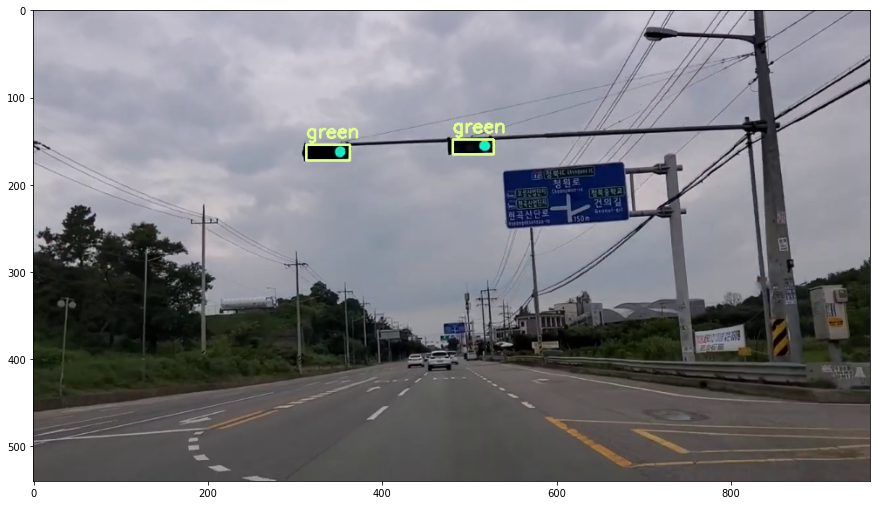

In [85]:
img = cv2.imread(paths + filename + '.png') 
font = cv2.FONT_HERSHEY_SIMPLEX 

for a,b,c in array:
    print(a,b,c)
    y,h,x,w = b
    w = w - x
    h = h - y
    text = c
    org = (x, y - 8) # 텍스트 위치
    
#     cv2.rectangle(img,(x, y, w, h), 255, 2)
#     cv2.putText(img, text, org, font, 0.8, (255, 0, 0), 2)
    
    if x > 0 and y > 0 and w > 0 and h > 0:
        cv2.rectangle(img, (x, y, w, h), (139, 255, 224), 2)
        cv2.putText(img, text, org, font, 0.7, (139, 255, 224), 2)


plt.figure(figsize = (15, 12))
fix_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(fix_img)
plt.show()


# cv2.imshow('image',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
# cv2.waitKey(1)

------------------------------------------